# Single-Qubit Tomography

## Theory

For single-qubit states the general expression for their density matrices can be written uniquely as:
$$\hat{\rho} = \frac{1}{2} \sum_{i=0}^{3} S_i \sigma_i. \tag{1}$$
Where $\sigma_i$ are the Pauli matrices (Including the 2x2 identity matrix as $\sigma_0$) and $S_i$ are the values given by:
$$S_i = Tr\{\hat{\sigma_i}\hat{\rho}\}. \tag{2}$$
It is also useful to note that, 
1. For all pure states: $\sum_{i=1}^{3} S_i^2 = 1$.
2. For mixed states: $\sum_{i=1}^{3} S_i^2 < 1$.
3. For the completely mixed state:  $\sum_{i=1}^{3} S_i^2 = 0$.
4. Due to the normalization condition for quantum states it is always the case that: $S_0^2 = 1$.

The above contents are from page 117 of the book Quantum State Estimation. Proofs of (1) and (2) to be added in the future.

For a quantum state represented by density matrix $\hat{\rho}$ the expectation value for an observable $\Omega$ is given by:
$$\langle \hat{\Omega} \rangle = \sum_{i} p_i \bra{i} \Omega \ket{i} = Tr \{ \hat{\Omega} \hat{\rho} \}. \tag{3}$$
Thus, using (1) and (3), we can represent the density matrix for a single-qubit state as:
$$\hat{\rho} = \frac{1}{2} \sum_{i=0}^{3} \langle \hat{\sigma_i} \rangle \hat{\sigma_i}. \tag{4}$$

## Example

Prepare a state using the prepare_state gate available in qiskit.

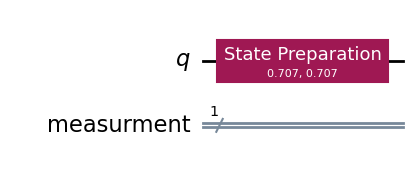

In [28]:
import math
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import *

# Instantiate quantum and classical registers each of 1 bit.
qr = QuantumRegister (1, 'q')
cr = ClassicalRegister(1, 'measurment')

# Create a quantum circuit and add the prepare_state function acting on qubit 0.
qc = QuantumCircuit(qr, cr)
qc.prepare_state(state = [1/math.sqrt(2), 1/math.sqrt(2)], qubits = 0)

# Draw the ciruit in mpl (matplotlib).
qc.draw("mpl")

Getting the expectation values. Using the StatevectorSampler available in qiskit I can simulate measurment on the qubits in the circuit. I know I will need to obtain 3 expectation values ($\langle \hat{\sigma_0} \rangle$ is always 1) 

In [29]:
xMeasure = QuantumCircuit(1,1)
xMeasure.append(HGate(), [0])
xMeasure.measure(0,0)

yMeasure = QuantumCircuit(1,1)
yMeasure.append(SdgGate(), [0])
yMeasure.append(HGate(), [0])
yMeasure.measure(0,0)

zMeasure = QuantumCircuit(1,1)
zMeasure.measure(0,0)

basis = [xMeasure, yMeasure, zMeasure]

Comment below

In [30]:
from qiskit.primitives import StatevectorSampler

exp = [] # Array to store expectation values.
shots = 100 # Number of times to run the circuit.

sampler = StatevectorSampler(default_shots = shots) # Record variable number of samples of the circuit (more samples improve accuracy).

for i in basis:
    result = sampler.run([qc.compose(i)]).result()[0] # Run the sampler on the quantum circuit and store the result.

    data = result.data # Get the data from the result of running the circuit.

    counts = data.measurment.get_counts()

    if '0' not in counts.keys():
        counts['0'] = 0
    if '1' not in counts.keys():
        counts['1'] = 0

    exp.append((counts['0'] - counts['1'])/shots)

    print(f"The counts are: {counts}")
    
print(exp)




The counts are: {'0': 100, '1': 0}
The counts are: {'0': 48, '1': 52}
The counts are: {'0': 50, '1': 50}
[1.0, -0.04, 0.0]


Reconstruct the state. Perhaps the fact that single-qubit density matrices can always be diagonalized could be used to get the origonal coefficients. 

In [31]:
import numpy as np

x, y ,z = exp

rho =   (1/2)*np.array([[(1+z),(x-y*1j)],
                        [(x+y*1j),(1-z)]])

print(rho)

[[0.5+0.j   0.5+0.02j]
 [0.5-0.02j 0.5+0.j  ]]
